# Ensemble Learning

### 앙상블 학습이란?

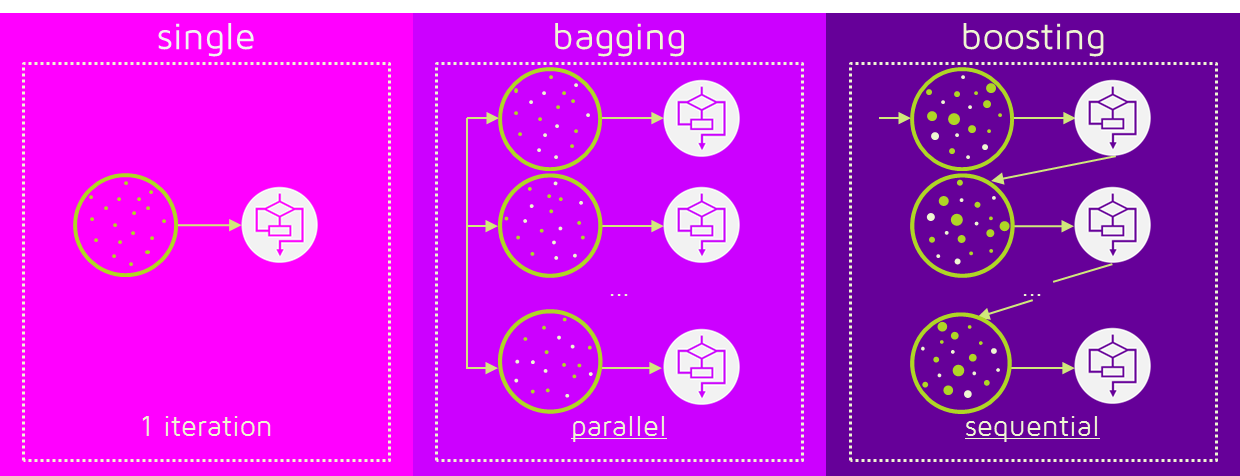

: 여러개의 분류기를 생성하고, 그 예측을 결합하여 보다 정확한 예측을 도출하고자 하는 기법.

강력한 모델 하나가 아닌 ***약한 모델 여러개***를 조합하여 더 정확한 예측에 도움을 주고자 한다.

#### 앙상블 학습에는 2가지 유형이 존재한다.


## [1] 투표형 모델
1. **보팅(voting)**
    - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다.
    - 서로 다른 알고리즘을 여러개 결합하여 사용한다.
    
    - 2가지 Voting 방법
        1. 하드 보팅(Hard Voting)
        : 다수의 분류기가 예측한 결과값을 최종 결과로 선정한다.
        2. 소프트 보팅(Soft Voting)
        : 모든 분류기가 예측한 레이블 값이 결정 확률 평균을 구한 뒤 가장 확률이 높은 레이블 값을 최종 결과로 선정한다.
        
        
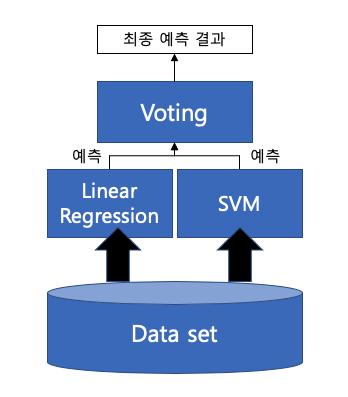  

2. **배깅(Bootstrap Aggregating)**
    - 데이터 샘플링(Bootstrap)을 통해 모델을 학습시키고 결과를 집계하는 방법이다.
    (**B**ootstrap + **agg**regat**ing** = **Bagging**)
    
    - 같은 유형의 알고리즘에 기반한 classifier를 사용한다.
    - 데이터 분할시에 중복을 허용한다. = 복원 추출
        - 범주형 변수의 경우 다수결 투표 방식으로 결과를 집계한다.
        - 연속형 변수의 경우 평균값으로 집계한다.
        
    - 과적합 방지에 효과적이다.
    
    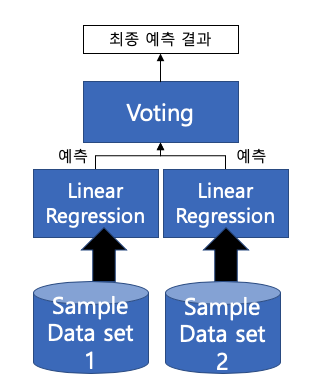

## [2] 부스팅 모델

:**이전 모델에서 좋은 결과를 내지 못했을 때 가중치를 주어서 성능을 높이는 방법**
***~점수 안나오는 과목은 가중치 0.8로 잘하는 과목은 가중치 0.2로~***


1. 부스팅(Boosting)
    - 여러개의 classifier가 순차적으로 학습을 수행한다.
    - 이전의 classifier가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 classifier에게 가중치를 부여하면서 학습과 예측을 진행함.
    - 예측 성능이 뛰어나 앙상블학습을 주도 하며 대표적인 모듈로 **XGBoost, LightGBM**이 있다.
    - 보통 부스팅 방식은 배깅에 비해 성능이 좋으나 속도가 느리고 과적합이 발생할 가능성이 존재하므로 상황에 따라 적절하게 사용해야 한다.
    
    
[구동 방식]

: 샘플 1에서 잘 분류하지 못한 데이터에 가중치를 주어 샘플 2로 넘긴다. 이때 복원 랜덤 샘플링이기 때문에 샘플 2에는 1에 없는 데이터도 들어갈 수 있다. 이 데이터에도 순차적으로 가중치를 부여한다. 최종 평가를 진행하는데 있어서 마지막으로 학습된 모델만이 아니라 이제까지 학습된 모든 모델을 모두 고려하여 적용한다.
   ***정확도를 높일 수는 있으나 outlier에 취약하다.***
    
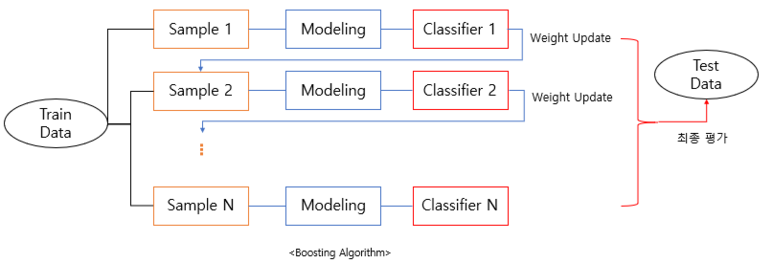

# BOOSTING

## AdaBoost(Adaptive Boosting)

: 부스팅 알고리즘은 가중치를 갱신한 **모든** 모델을 같이 고려한다. 

그 중 **에이다부스트** 알고리즘은 부스팅 기법중 가장 널리 사용 된다.

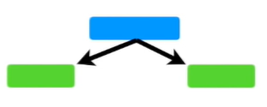


위 그림과 같이 노드 하나에 두개의 leaf를 가진 트리를 stump라고 한다.

AdaBoost는 이 스텀프가 여러개 있는 형태를 말한다. 

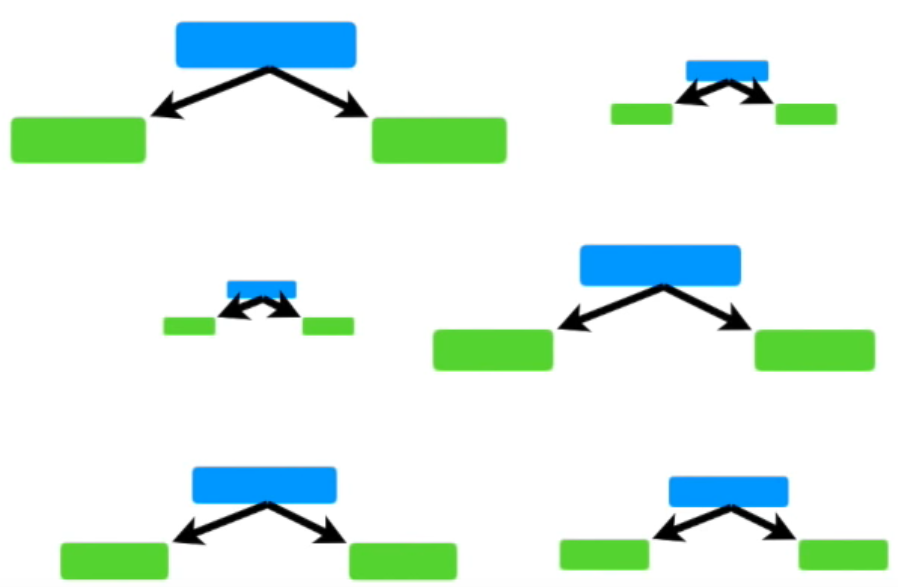

stump는 tree와는 다른 형태로 정확한 분류를 하지 못한다.
단하나의 질문으로 데이터를 분류하기 때문에 weak learner에 속한다.

같은 앙상블 모델인 random forest는 각각 동등한 가중치를 가지고 여러개 트리의 결과를 합산해 최종 결과를 낸다.


하지만 Adaboost 모델에서는 특정 스텀프가 다른 스텀프보다 중요하다.
가중치를 부여한 stump가 곧 크기가 큰 stump인데, 이렇게 가중치가 높다는 것을 **amount of say가 높은 상태**라고 말한다 = 결과에 미치는 영향이 큰 상태.



### 정의

Adaboost는 초기에 약한 모형을 설정하며 매 스탭마다 가중치를 이용하여 이전 모형의 약점을 보완하는 새로운 모형을 순차적으로 적합한다. 이 모형들이 선형으로 결합하여 얻어진 모형을 생성시키는 알고리즘이다.

약한 모델을 모아서 성장해서 강하게~~~


### 정리

- weak learner로 구성되엇으며 stump의 형태이다.
- stump들 간의 가중치가 다르며 가중치가 높은 stump를 amount of say가 큰 상태라고 말한다.
- 각 stump의 error는 다음 stump의 결과에 영향을 준다. -> stump들 간에 순서가 있음을 알 수 있다.


### 모형 구동에 가장 중요한 파라미터 
- M: 내가 학습에 사용할 모형의 갯수
     * 모형 갯수를 설정한 뒤 학습 데이터를 이용해 모형을 적합하고 가중치를 업데이트 한다. 업데이트 된 가중치를 이용해 복원추출하고 새로운 학습 데이터를 생성하게 된다.
- K: 내가 분류하는 라벨의 갯수

## 요점 정리

- bagging: 병렬 학습
    - 모든 분류기가 **같은 가중치**를 가지고 학습


- boosting: 순차적 학습
   - 학습 결과에 따라 **다른 가중치** 부여 후 이 가중치가 다음 모델에 영향을 미침.
        - 오답에 더 높은 가중치를 부여해 **오답에 집중**하는 형식의 학습
        
        
- **비교**    
    - error: 부스팅이 더 적음
    - 성능: 부스팅이 더 나음
    - 속도: 부스팅이 더 느림
    - 오버 피팅 가능성: 부스팅이 더 많음
        
        
- **결론** 
    - 배깅: 오버피팅이 문제일 때
    - 부스팅: 개별 결정 트리의 낮은 성능이 문제일 때
    

# 실습

#### - sckit learn


## [classifier]


### 실제로 Sckit learn에서 구동시 꼭 조절해야하는 파라미터 
   - base_learner: 가본 분류기 지정(따로 설정하지 않으면 최대 깊이가 1인 디씨전 트리 분류기로 작동)
   - n_estmators: 반복수 혹은 분류기의 개수 지정이 가능하다.
   - learning_rate: 스텝사이즈 지정

In [35]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_iris, load_boston #추출기와 분류기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]

X = df.drop('species', axis=1)
y = df['species']

In [36]:
clf = AdaBoostClassifier(
             ### base_estimator는 base_leaener로 
             ###본인이 사용하고자 하는 다양한 classifier, estimator 활용이 가능하다.
            base_estimator=DecisionTreeClassifier(max_depth=2, 
                                                  min_samples_leaf=10), 
            n_estimators=5, ### 반복수 또는 base_estimator 개수
            learning_rate=0.5, ### 스텝 사이즈
            random_state=100
        ).fit(X,y)

In [37]:
### 예측
print(clf.predict(X)[:3]) 
 
### 변수 중요도
for i, col in enumerate(X.columns):
    print(f'{col} 중요도 : {clf.feature_importances_[i]}')
 
print(clf.get_params()) ### AdaBoostClassifier 클래스 인자 설정 정보
print("                                  ")
print('Accuracy : ', clf.score(X,y)) ### 성능 평가 점수


['setosa' 'setosa' 'setosa']
sepal length (cm) 중요도 : 0.019650877114798036
sepal width (cm) 중요도 : 0.2039352104748035
petal length (cm) 중요도 : 0.22872742660870043
petal width (cm) 중요도 : 0.547686485801698
{'algorithm': 'SAMME.R', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 2, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(max_depth=2, min_samples_leaf=10), 'learning_rate': 0.5, 'n_estimators': 5, 'random_state': 100}
                                  
Accuracy :  0.9733333333333334


In [13]:
### n_estimator를 5로 설정했기 때문에 5개의 분리 변수가 출력된다.
### 각 루트 노드에서의 분리 변수

for i in range(len(clf.estimators_)):
    ind_est = clf.estimators_[i]
    col_idx = ind_est.tree_.feature[0]
    print(X.columns[col_idx]) 


petal width (cm)
petal length (cm)
petal width (cm)
petal width (cm)
petal width (cm)


### 시각화

 만약 base_estimator가 의사결정나무처럼 **시각화가 자유로운 학습기**이고 **반복수(분류기 개수)가 적을 시** ***(5개이하)*** 에 순차적인 시각화가 가능하다.

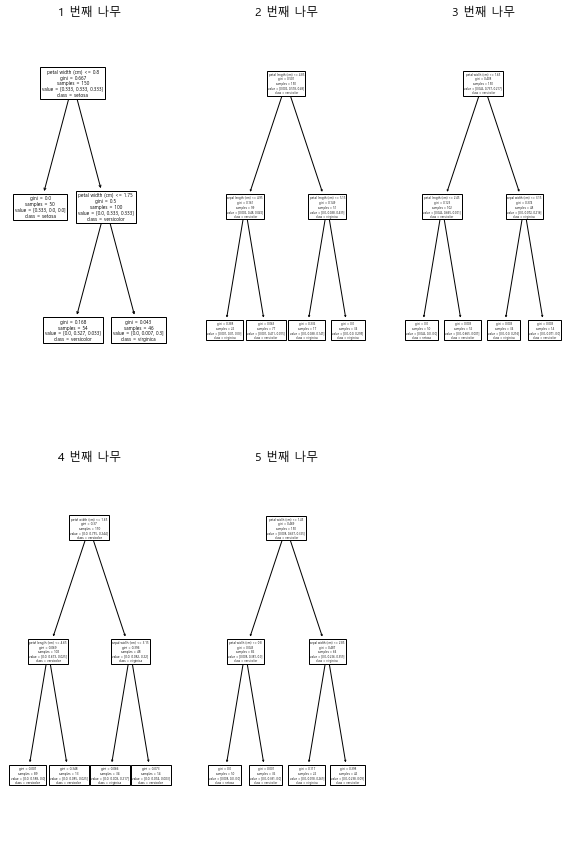

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  #한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

n_estimator = len(clf.estimators_)
fig = plt.figure(figsize=(10, 15), facecolor='white')
 
row_num=2
col_num=3
for i in range(n_estimator):
    ax = fig.add_subplot(row_num, col_num, i+1)
    plot_tree(clf.estimators_[i],           
              feature_names=X.columns, ## 박스에 변수 이름 표시
              class_names=clf.classes_, ## 클래스 이름(범주 이름)
              ax=ax
             )
    ax.set_title(f'{i+1} 번째 나무')
plt.show()

### [Regressor]

- 보스턴 집값 데이터 활용

데이터 설명

    CRIM: 타운 주민 일인당 범죄율
    ZN: 2500평당 이상 단지 중 주거용지 비율
    INDUS: 타운 비소매 상업지 비율
    CHAS:찰스강 주변 여부(더미변수), 1 = 찰스강 주변 , 0 = 찰스강 주변 아님
    NOX: 오염물질 농도
    RM: 주택 평균 방 개수
    AGE: 1940년 전 건축 주택 비율
    DIS: 보스턴 고용센터와 가중거리
    RAD: 도시 고속도로 접근성 지표
    TAX: ( 보유세 단위 1000불)
    PTRATIO: 학생교사 비율
    B: 흑인 거주지 비율 지표
    LSTAT: 저소득 가구 비율
    PRICE: 보스턴 타운 평균 주택가격
    
  - 주로 이용되는 타겟 변수
    MEDV: 본인 소유의 주택 가격(중앙값) (단위: $!000)
    


지난 회귀분석 스터디와 같이 타겟 변수는 'MEDV'로 한다.

보스턴 데이터 셋의 경우 주택가격을 종속 변수로 놓고 다른 독립 변수를 조합하는 것이 가장 유의미한 모형을 만들 수 있다.


In [28]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
 
X = df.drop('MEDV', axis=1)
y = df['MEDV']
 
reg = AdaBoostRegressor(
            base_estimator=DecisionTreeRegressor(
                            criterion='friedman_mse',
                            max_depth=2,
                            min_samples_leaf=10
                            ), ### base_learner
            n_estimators=50, ### 분류기 개수
            random_state=100
        ).fit(X,y)

In [29]:
### 예측
print(reg.predict(X)[:3]) 
 
### 변수 중요도
for i, col in enumerate(X.columns):
    print(f'{col} 중요도 : {reg.feature_importances_[i]}')
 
print(reg.get_params()) ### AdaBoostRegressor 클래스 인자 설정 정보
print("                                  ")
print('R-square : ', reg.score(X,y)) ### 성능 평가 점수

[27.8624031  26.41714286 33.30403226]
CRIM 중요도 : 0.02549293953723969
ZN 중요도 : 0.0
INDUS 중요도 : 0.0003749290532376079
CHAS 중요도 : 0.0
NOX 중요도 : 0.04277659475888821
RM 중요도 : 0.19177482093213669
AGE 중요도 : 0.010331113373319326
DIS 중요도 : 0.16522227181166557
RAD 중요도 : 0.026284734130150637
TAX 중요도 : 0.020434392039888984
PTRATIO 중요도 : 0.060699561852205694
B 중요도 : 0.05114678249081635
LSTAT 중요도 : 0.40546186002045115
{'base_estimator__ccp_alpha': 0.0, 'base_estimator__criterion': 'friedman_mse', 'base_estimator__max_depth': 2, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 10, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      min_samp

In [30]:
### 각 루트 노드에서의 분리 변수

for i in range(len(reg.estimators_)):
    ind_est = reg.estimators_[i]
    col_idx = ind_est.tree_.feature[0]
    print(X.columns[col_idx]) 

RM
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
RM
RM
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
TAX
B
LSTAT
RM
RM
LSTAT
RM
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
B
LSTAT
RM
LSTAT
RM
LSTAT
LSTAT
LSTAT
RM
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
LSTAT
RM
LSTAT
RM


# Bagging


## [Classifier]


### 실제로 sckit learn에서 구동시 꼭 조절해야 하는 파라미터
- base_estimator: 기본 학습기의 모형 클래스
- n_estimator: 부트스트랩 샘플 개수 혹은 기본 학습기 개수
- max_sample: 부트스트랩 샘플 비율
- bootstrap: 복원, 비복원 추출 여부
- oob_score: out-of-bag 데이터를 이용한 검증 여부 설정
    - oob 데이터: 부트스트랩을 통한 랜덤 복원 추출시 train 데이터에 속하지 않는 데이터
    - oob error: 부트스트랩에 포함되지 않은 데이터가 decision tree를 통해 나온 나온 예측값와 실제값의 차이
    
    
 **간단한 구동원리**
   
   배깅을 통해 만들어진 부트스트랩은 train 데이터로 사용된다.
    부트스트랩에 속하지 않는 데이터는 test 데이터이다.
    이때 훈련 과정에서 배깅을 사용하지 않는다면 oob 데이터 대신 독립된 test 데이터를 이용해 오차를 계산하는게 가능하다.
    
  

In [31]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor   

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]
X = df.drop('species', axis=1)
y = df['species']

clf = BaggingClassifier(
            base_estimator = DecisionTreeClassifier(max_depth=5), # base learner
            n_estimators=50, # 부트스트랩 샘플 개수 또는 base_estimator 개수
            max_samples=1, # 부트스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링.
            bootstrap=True, # 복원 추출,  False이면 비복원 추출
            oob_score=True, # OOB 데이터를 이용한 성능 계산
            random_state=100
        ).fit(X,y)

In [32]:
### 예측
print(clf.predict(X)[:3]) 
 
### 성능 평가
print(clf.oob_score_) ## OOB 성능 평가 점수
print("                                  ")
print('Accuracy : ', clf.score(X,y)) ## 테스트 성능 평가 점수


['setosa' 'setosa' 'setosa']
0.32666666666666666
                                  
Accuracy :  0.3333333333333333


## [Regressor]

- classifier와 다른점
    :base_estimator에 회귀 모형을 위한 클래스를 넣어야 한다.

In [33]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
 
X = df.drop('MEDV', axis=1)
y = df['MEDV']
 
reg = BaggingRegressor(
            base_estimator = DecisionTreeRegressor(max_depth=3), # base learner
            n_estimators=50, # 부트스트랩 샘플 개수 또는 base_estimator 개수
            max_samples=1, # 부트스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링한다.
            bootstrap=True, # 복원 추출,  False이면 비복원 추출
            oob_score=True, # OOB 데이터를 이용한 성능 계산
            random_state=100
        ).fit(X,y)

In [34]:
### 예측
print(reg.predict(X)[:3]) 
 
### 성능 평가
print(reg.oob_score_) # OOB 성능 평가 점수
print("                                  ")
print('R-square : ', reg.score(X,y)) # 테스트 성능 평가 점수


[21.87 21.87 21.87]
-0.008699745217437327
                                  
R-square :  -0.005203915340047827
